In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from matplotlib import pyplot as plt
import numpy as np
from mlp_helper import draw_neural_net, return_weights_notation

Interesante articulo sobre Universal Aproximation Theorem:

http://neuralnetworksanddeeplearning.com/chap4.html

# Pruebas a realizar
- hidden units 2, 3, 6
- Activation sigmoid y relu

# Dataset

In [3]:
def get_data(seed=10, fr=-20, to=20, sigma = 0.01, N=200):
    np.random.seed(seed)
    X = np.linspace(fr, to, N)
    
#     y = np.abs(X) + np.random.normal(0, sigma, len(X))
    y = np.cos(X/2) + np.random.normal(0, sigma, len(X))
    return X, y

In [8]:
X, y = get_data(seed=10, fr=-20, to=20, sigma = 0.01, N=200)

Text(0, 0.5, '$y$')

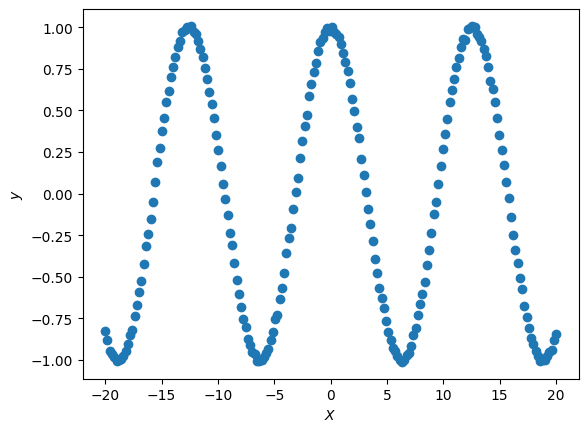

In [9]:
plt.scatter(X, y)
plt.xlabel('$X$')
plt.ylabel('$y$')

# Model

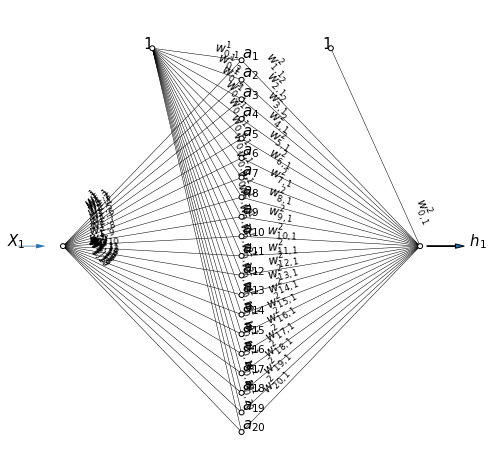

In [99]:
input_dim = 1
hidden_units = 20
outputs = 1
activation = 'sigmoid'

fig, ax = plt.subplots(1,1,figsize=(8, 8))
shape = [input_dim,hidden_units,outputs]
weights, biases = return_weights_notation(shape)
draw_neural_net(ax, 0.1, 0.9, 0, 0.9, shape, weights, biases)

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [101]:
model = Sequential()
model.add(Dense(hidden_units, input_shape=(input_dim,), activation=activation))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [102]:
from tensorflow.keras.optimizers import Adam, SGD #, rmsprop
model.compile(Adam(lr=0.1), loss='mse', metrics=['mse'])

# Entrenamiento del modelo

In [103]:
X.shape, y.shape

((200,), (200,))

In [104]:
model.fit(X, y, verbose=0, epochs=1000, batch_size=100)

In [105]:
print(model.metrics_names)
print(model.evaluate(X, y))

['loss', 'mse']
7/7 [==============================] - 0s 499us/step - loss: 0.0021 - mse: 0.0021
[0.002074623480439186, 0.002074623480439186]


In [106]:
y_pred = model.predict(X)

Text(0, 0.5, '$h_1$')

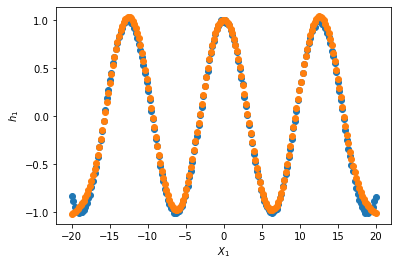

In [107]:
plt.scatter(X, y)
plt.scatter(X, y_pred)
plt.xlabel('$X_1$')
plt.ylabel('$h_1$')

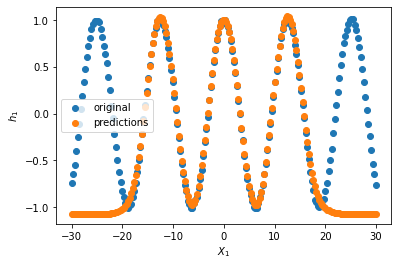

In [114]:
X_2, y_2 = get_data(seed=10, fr=-30, to=30, sigma = 0.01, N=200)

y_pred_2 = model.predict(X_2)
plt.scatter(X_2, y_2, label='original')
plt.scatter(X_2, y_pred_2, label='predictions')
plt.xlabel('$X_1$')
plt.ylabel('$h_1$')
plt.legend()

In [88]:
model.get_weights()

[array([[ 1.0529584 , -1.6686586 , -2.0445585 , -2.0807762 ,  2.0615041 ,
          2.3282743 ,  2.100823  , -1.7328358 ,  2.3383005 , -1.2193589 ,
          1.524993  ,  1.9204628 ,  0.07029899,  1.3798771 ,  1.0944394 ,
          2.0444899 ,  2.1900399 , -2.3884327 ,  1.1748592 ,  0.20061299]],
       dtype=float32),
 array([-10.356302 , -15.802854 ,  -7.139879 ,  -9.092753 ,  -9.031822 ,
        -10.747955 ,   4.873488 ,   1.0467461,  -2.2869616, -18.978647 ,
         -5.3101673,   1.5352489,  -8.181561 ,  -4.369085 , -17.010609 ,
         -4.7721624,  -8.037672 , -10.871292 ,  -2.2896106,  -6.7062435],
       dtype=float32),
 array([[ 2.1381998 ],
        [ 1.8235335 ],
        [-0.55466723],
        [-0.13130414],
        [-0.1710075 ],
        [-0.23331176],
        [ 0.589129  ],
        [ 0.31099334],
        [-0.00473415],
        [-1.885746  ],
        [-0.11902054],
        [ 0.46313545],
        [-0.3712309 ],
        [-0.07853355],
        [-2.0775177 ],
        [-0.622458

In [89]:
def get_sub_model(model, index, idx1=0, idx2=1, activation='sigmoid', input_dim=2):
    layer_1_w = model.get_weights()[idx1]
    layer_1_b = model.get_weights()[idx2]
    sub_model_weights = [np.array([layer_1_w[:,index]]).T, np.array([layer_1_b[index]])]
    sub_model = Sequential()
    sub_model.add(Dense(1, input_shape=(input_dim,), activation=activation))
    sub_model.set_weights(sub_model_weights)
    sub_model.compile(Adam(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])
    return sub_model

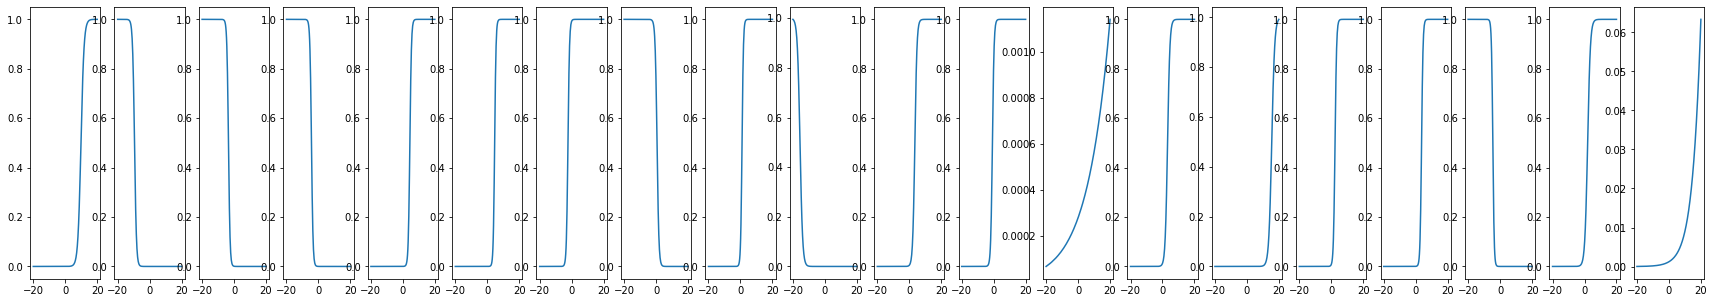

In [91]:
f, ax = plt.subplots(1, hidden_units, figsize=(30,5))
sub_models = []
preds = []
for i in range(hidden_units):
    sub_model = get_sub_model(model, i, activation=activation, input_dim=1)
    sub_models.append(sub_model)
    preds.append(sub_model.predict(X))
    ax[i].plot(X, preds[i])

# Ejemplo con hidden_units=3 Activation sigmoid

![sigmoid_aprox_3hidden.png](sigmoid_aprox_3hidden.png)
![sigmoid_aprox_3hidden_all.png](sigmoid_aprox_3hidden_all.png)

# Calc Frequency

In [367]:
from tensorflow.keras.layers import Lambda
from tensorflow import math

In [368]:
X, y = get_data(seed=10, fr=-20, to=20, sigma = 0.01, N=200)

In [392]:
def get_model_cos():
    model = Sequential()
    model.add(Dense(1, input_dim=1, use_bias=False))
    model.add(Lambda(lambda x: math.cos(x)))
    return model


In [393]:
model = get_model_cos()
model.compile(Adam(lr=0.1), loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 1)                 1         
_________________________________________________________________
lambda_37 (Lambda)           (None, 1)                 0         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [394]:
history = model.fit(X, y, verbose=0, epochs=100, batch_size=10)

In [395]:
print(model.metrics_names)
print(model.evaluate(X, y))

['loss', 'mse']
7/7 [==============================] - 0s 535us/step - loss: 1.4215e-04 - mse: 1.4215e-04
[0.0001421503839083016, 0.0001421503839083016]


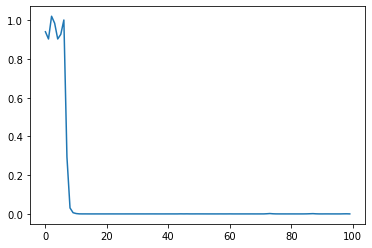

In [396]:
plt.plot(history.history['loss'])

In [397]:
y_pred = model.predict(X)

Text(0, 0.5, '$h_1$')

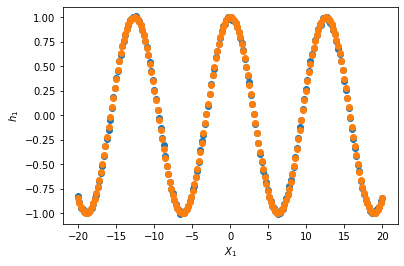

In [398]:
plt.scatter(X, y)
plt.scatter(X, y_pred)

plt.xlabel('$X_1$')
plt.ylabel('$h_1$')